In [1]:
module('load', 'pytorch/gpu-cuda-12.1/2.2.0')

Loading pytorch/gpu-cuda-12.1/2.2.0
  Loading requirement: cuda/12.1 cudnn/8.9.2


In [2]:
# main_lens_dict={
#     "system_index": 0,
#     "precomputed": {
#         "D_l": 895.141641604983,
#         "D_s": 1719.2297595274565,
#         "D_ls": 1383.4035047295204,
#         "Theta_E": 5.931095815829854e-06
#     },
#     "lens_model": {
#         "num_substructures": 0,
#         "mass_components": [
#             {
#                 "type": "PEMD",
#                 "is_substructure": False,
#                 "params": {
#                     "pos": [
#                         0.0,
#                         0.0
#                     ],
#                     "redshift": 0.27630325852132565,
#                     "vel_disp": 229.76100223115105,
#                     "slope": 0.825713219064535,
#                     "orient": [
#                         1.8219410700100875
#                     ],
#                     "q": [
#                         0.7696236448774971
#                     ]
#                 }
#             }
#         ]
#     },
#     "source_model": {
#         "type": "Gaussian_blob",
#         "params": {
#             "I": 1.0,
#             "position_rad": [
#                 5.7680415247008e-07,
#                 -1.1513580580248836e-07
#             ],
#             "orient_rad": 0.0,
#             "q": 0.8,
#             "std_kpc": 1.4,
#             "redshift": 2.4019740198871116
#         }
#     }
# }


# sub_dict={
#     "type": "NFW",
#     "is_substructure": True,
#     "params": {
#         "pos": [
#             -4.633905994729479e-06,
#             1.0418124529340142e-05
#         ],
#         "mass_max": 99999999999.9998,
#         "r_max_kpc": 3.031994721038995,
#         "redshift": 0.27630325852132565
#     }
# }

main_lens_dict={
    "system_index": 11,
    "precomputed": {
        "D_l": 1787.8262293384223,
        "D_s": 1539.2009840358578,
        "D_ls": 449.9684790307436,
        "Theta_E": 5.954515276371751e-06
    },
    "lens_model": {
        "num_substructures": 0,
        "mass_components": [
            {
                "type": "PEMD",
                "is_substructure": False,
                "params": {
                    "pos": [
                        0.0,
                        0.0
                    ],
                    "redshift": 1.7629021821047843,
                    "vel_disp": 381.676655549674,
                    "slope": 1.1386734630729884,
                    "orient": [
                        0.9017743025951793
                    ],
                    "q": [
                        0.5384704819933674
                    ]
                }
            }
        ]
    },
    "source_model": {
        "type": "Gaussian_blob",
        "params": {
            "I": 1.0,
            "position_rad": [
                5.468951500607737e-07,
                7.709517743986199e-07
            ],
            "orient_rad": 0.0,
            "q": 0.8,
            "std_kpc": 0.8,
            "redshift": 3.534926168256522
        }
    }
}


sub_dict= {
    "type": "NFW",
    "is_substructure": True,
    "params": {
        "pos": [
            9.483614740698115e-06,
            8.167519092202279e-06
        ],
        "mass_max": 2614350859.4532137,
        "r_max_kpc": 3.5158737851037714,
        "redshift": 1.7629021821047843
    }
}

In [3]:
import numpy as np
from shared_utils import units
import astropy.units as u


def get_r_max_from_M_max(M_max):
    M_max=M_max*u.M_sun
    A=0.344*u.kpc #kpc
    B=1.607
    const_1=(np.log(2.163+1.)+1/(2.163+1)-1)*4*np.pi
    #print(const_1)    
    from astropy.constants import G
    G = G.to(u.kpc * u.km**2/u.s**2 / u.M_sun)
    const_2=(10* u.km/u.s     /1.64/np.sqrt(G)   *(2.163/A)**(1/B)    )**2
    #print(const_2)
    r_s=((M_max/const_1/const_2).to(u.kpc**(1 + 2/B)))**(B/(B+2))
    r_max=2.163*r_s
    return r_max.to(u.kpc).value


In [4]:
from lensing_system import LensModel as LensModelNonBatched
from lensing_system_broadcasting import LensModel
from lensing_system_broadcasting import SourceModel
from shared_utils import recursive_to_tensor
import torch
from substructure_classifier.substructure_classifier_development import SubstructureClassifier
from substructure_classifier.training_stage_development import Stage


from shared_utils import _grid_lens
image_grid=_grid_lens(8.0, 500, device="cuda")
eval_grid=_grid_lens(6.0, 80, device="cuda")


loaded_classifier=SubstructureClassifier(classifier_name="ResnetNoiseLowRes_mult_gains_new_scheduling")
#classifier_stage=Stage(classifier_instance=loaded_classifier , stage_id="f150c8927ca739fff70456a01caaedbdc3361c1872381fe1e9a811d2f3e2b83d")
classifier_stage=Stage(classifier_instance=loaded_classifier , stage_id="8635703014f58e3ace8ca5a0c67329342a5095f0d06482998ab3f663544e015a")

model=classifier_stage.get_model(compiled=True)



cuda
doneStage1
doneStage2
doneStage3
doneStage4
doneStage5
load_stage1
load_stage2
load_stage2.1
load_stage3
load_stage4
load_stage5
load_stage6
doneStage6
doneStage7


Process ForkProcess-17:
Process ForkProcess-1:
Process ForkProcess-5:
Process ForkProcess-4:
Process ForkProcess-18:
Process ForkProcess-14:
Process ForkProcess-2:
Process ForkProcess-16:
Process ForkProcess-6:
Process ForkProcess-9:
Process ForkProcess-3:
Process ForkProcess-7:
Process ForkProcess-15:
Process ForkProcess-8:
Process ForkProcess-13:
Process ForkProcess-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/multiprocessi

done1
done2
tensor(5.9545e-06, device='cuda:0')
done3
done4
done5
torch.Size([16, 500, 500])


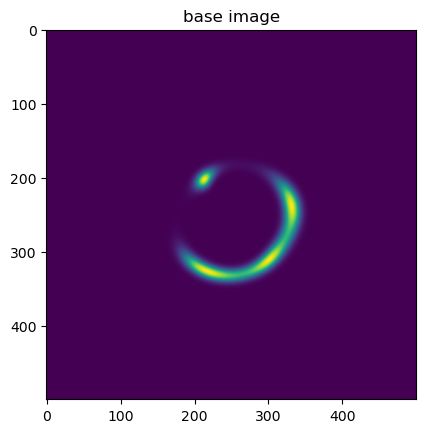

done6


  0%|          | 0/5600 [00:00<?, ?it/s]/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu-cuda-12.1/anaconda_3_2023.03-2023.03/2.2.0/lib/python3.10/site-packages/torch/_inductor/compile_fx.py:140: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(
100%|██████████| 5600/5600 [01:06<00:00, 84.69it/s] 


In [5]:
import tqdm
import torch.nn.functional as F


from noise_applicator import NoiseApplicator, GaussKernel

class SensMapMaker:
    def __init__(
        self,
        main_lens_dict=main_lens_dict,
        substructure_dict=sub_dict,
        sub_key_changed="mass_max",
        values_key = 10**torch.linspace(7.,11., 14),
        evaluation_grid=eval_grid,
        image_grid=image_grid,
        model=model,
        batch_size=16
    ):
        self.image_grid=image_grid
        self.evaluation_grid=evaluation_grid
        self.batch_size=batch_size
        self.model=model.to("cuda")
        
        print("done1")
        main_lens_dict=recursive_to_tensor(main_lens_dict, device="cuda")
        self.precomp_raw=main_lens_dict["precomputed"] #raw because it will have to be converted to a specific format
        self.source_raw=main_lens_dict["source_model"]
        #1: compute the deflection of the main lens
        main_lens_model = LensModelNonBatched(
            main_lens_dict["lens_model"], 
            precomp_dict=main_lens_dict["precomputed"], 
            device='cuda')
        print("done2")

        self.source_redshift = main_lens_dict["source_model"]["params"]["redshift"]
        self.base_deflection = main_lens_model(image_grid, self.source_redshift).unsqueeze(0).repeat(batch_size, 1, 1, 1)
        print("done3")

        #2: build the systems made of only one sub properly,
        # : we can't built them all toghether with the current lens class.
        # : but I can prepare the batches of initializations, as well as the sub class
        self.sub_raw=sub_dict
        self.set_sub_params_matrix(evaluation_grid, sub_key_changed, values_key)
        #3: build the source properly: since the source is always the same, 
        #   we could keep only one object, with the params and precomp of the fixed size
        #   of the calculation batch.
        print("done4")

        source_data=self.get_source_config(batch_size)
        source_precomp=self.get_expanded_precomp(batch_size)
        
        self.source_model=SourceModel(source_data, source_precomp)
        print("done5")

        image=self.source_model(self.base_deflection)
        print(image.shape)
        import matplotlib.pyplot as plt
        
        plt.imshow(image[0].detach().cpu())
        plt.title("base image")
        plt.show()
            
        print("done6")

        self.get_logits_matrix()
            
    def set_sub_params_matrix(self, evaluation_grid, sub_key_changed, values_key):
        # thi is a matrix of this shape:
        # if n_p is the number of params of the sub, and n_t the nubmer of values tried
        # [n_p, n_t, shape_eval_grid]
        H, W = evaluation_grid.shape[:2]

        self.n_values=n_values=torch.as_tensor(values_key).shape[0]
        sub_param_map={
            'NFW': ['pos_x', 'pos_y','mass_max','r_max_kpc','redshift'],
        }

        sub_type=self.sub_raw["type"]
        sub_params=self.sub_raw["params"]

        if sub_type not in sub_param_map:
            raise NotImplemented

        if sub_type=='NFW':
            init_tensor=torch.tensor([
                sub_params['pos'][0],
                sub_params['pos'][1],
                sub_params['mass_max'],
                sub_params['r_max_kpc'],
                sub_params['redshift'],

            ], device="cuda")
            
            self.n_params=5
            self.sub_type='NFW'
            params_matrix=torch.empty((self.n_params, n_values, evaluation_grid.shape[0], evaluation_grid.shape[1]))
            params_matrix[0, :, :, :]=evaluation_grid[:,:, 0]
            params_matrix[1, :, :, :]=evaluation_grid[:,:, 1]
            params_matrix[2:] = init_tensor[2:, None, None, None].expand(-1, n_values, H, W)
            #now_fill the rest of the matrix
            
            if sub_key_changed=="mass_max":
                # move to the same device/dtype as your params_matrix
                vals = torch.as_tensor(values_key, device=params_matrix.device, dtype=params_matrix.dtype)
                
                value_r_max=torch.as_tensor(get_r_max_from_M_max(values_key), device=params_matrix.device, dtype=params_matrix.dtype)
                # reshape to (n_values, 1, 1)
                vals = vals.view(n_values, 1, 1)
                value_r_max= value_r_max.view(n_values, 1, 1)

                # Option B: explicitly expand to (n_values, H, W)
                vals_expanded = vals.expand(n_values, H, W)
                value_r_max_expanded=value_r_max.expand(n_values, H, W)
                params_matrix[2] = vals_expanded
                params_matrix[3] = value_r_max_expanded

            
            else:
                raise NotImplemented
                
            self.params_matrix=params_matrix


    def get_logits_matrix(self):
        
        #initialize the logits matrix
        all_logits=[]
        bs=self.batch_size
        flat = self.params_matrix.permute(1, 2, 3, 0)  
        flat = flat.reshape(-1, self.n_params)  
        shared_precomp=self.get_expanded_precomp(bs)
        self.model.eval()
        
        H, W = self.evaluation_grid.shape[:2]
        
        tot_im_to_comp=flat.shape[0]
        
        #Noise
        
        sky_level=0.4
        kernel_size=5
        kernel_sigma=1
        gain=1e6
        
        gauss_kernel = GaussKernel(kernel_size, sigma=kernel_sigma, device="cuda").get_kernel()
        self.psf_and_poisson_noise = NoiseApplicator(apply_poisson=True,
                                                    sky_level=sky_level,
                                                    gain=gain,
                                                    psf=gauss_kernel,
                                                    device="cuda")
        
        
        #strategy with last batch:just pad and slice away

        with torch.no_grad():
            for i in tqdm.tqdm(range(0, flat.shape[0], bs)):
                is_last_batch=i+bs> tot_im_to_comp
                if is_last_batch:
                    batch_params = flat[i:i+bs]   
                    cur_bs = batch_params.size(0)
                    last_row = batch_params[-1:]
                    padding  = last_row.expand(bs - cur_bs, -1)
                    batch_params = torch.cat([batch_params, padding], dim=0)
                else:
                    batch_params = flat[i:i+bs]      
                    
                sub_init=self.get_sub_init(batch_params, self.sub_type)
                sub_model=LensModel(
                    bs,
                    sub_init,
                    shared_precomp
                )

                sub_deflection = sub_model.deflection_field(self.image_grid)
                source_grid=self.base_deflection+sub_deflection
                no_noise_image_batch=self.source_model(source_grid).unsqueeze(1)
                
                no_noise_image_batch2=F.avg_pool2d(no_noise_image_batch, kernel_size=5, stride=5)
             

                images= self.psf_and_poisson_noise.apply(no_noise_image_batch2)
    
                max_val = images.amax(dim=(2, 3), keepdim=True).clamp_min(1e-12)
                images = images / max_val

                
                
                
                logits = self.model(images).detach().cpu()         # -> [<=bs, 2]
                if is_last_batch:
                    all_logits.append(logits[:cur_bs])

                else:
                    all_logits.append(logits)

        all_logits = torch.cat(all_logits, dim=0)  # [n_values*H*W, 2]

        
        logits_matrix = all_logits.view(self.n_values, H, W, 2)
        self.logits_matrix = logits_matrix.permute(3, 0, 1, 2)
        
        
    def get_sub_init(self, parameters_batch, sub_type):
        sub_param_map={
            'NFW': ['pos_x', 'pos_y','mass_max','r_max_kpc','redshift'],
        }
        sub_init= {
            sub_type:{
                'sys_idx':   torch.arange(0, parameters_batch.shape[0], device="cuda"),
                'params':    parameters_batch,
                'param_map': sub_param_map[sub_type]
            }
        }
        return sub_init

    

            
    def get_expanded_precomp(self, n_samples):
        precomp_map = ['D_l', 'D_s', 'D_ls', 'Theta_E']
        params=torch.tensor([[
             self.precomp_raw['D_l'], 
             self.precomp_raw['D_s'], 
             self.precomp_raw['D_ls'], 
             self.precomp_raw['Theta_E'] 
        ]], device="cuda")

        precomp_processed = {
            'sys_idx':   torch.arange(0, n_samples, device="cuda"),
            'params': params.repeat(n_samples, 1),
            'param_map': precomp_map
        }

        return precomp_processed


    def get_source_config(self, n_samples):
        source_param_map={
            'Gaussian_blob': ['position_rad_x', 'position_rad_y', 'I' ,'orient_rad','q','std_kpc','redshift']
        }

        source_type=self.source_raw["type"]
        source_params=self.source_raw["params"]

        if source_type not in source_param_map:
            raise NotImplemented

        if source_type=='Gaussian_blob':
            init_tensor=torch.tensor([[
                source_params['position_rad'][0],
                source_params['position_rad'][1],
                source_params['I'],
                source_params['orient_rad'],
                source_params['q'],
                source_params['std_kpc'],
                source_params['redshift'],

            ]], device="cuda")

        source_init={
            source_type: 0
        }
        source_init[source_type] = {
            'sys_idx':   torch.arange(0, n_samples, device="cuda"),
            'params':    init_tensor.repeat(n_samples, 1),
            'param_map': source_param_map[source_type]
        }
        return source_init
    def logits_mat_to_detect_thres(self, confidence):
        pass


a=SensMapMaker()


In [6]:
logits_matr=a.logits_matrix
print(logits_matr.shape)

torch.Size([2, 14, 80, 80])


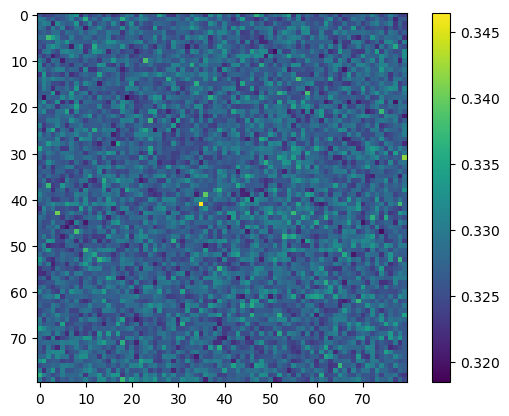

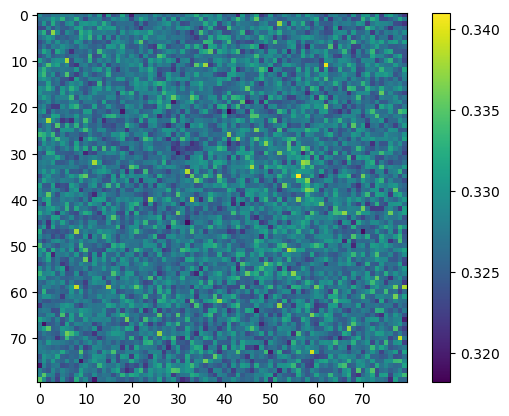

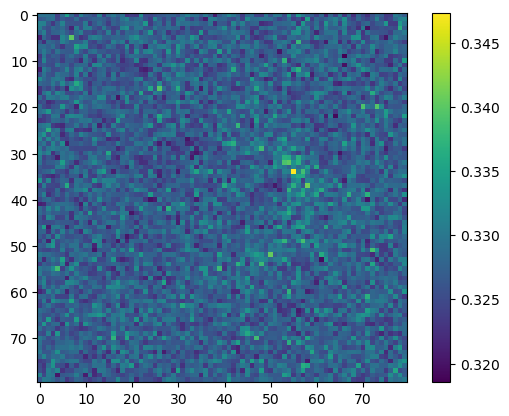

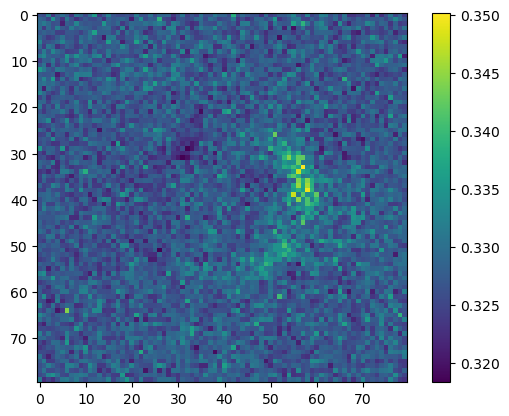

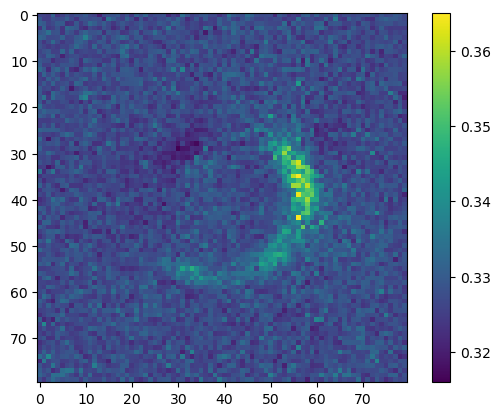

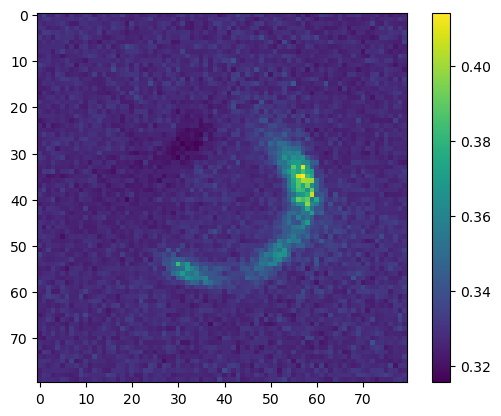

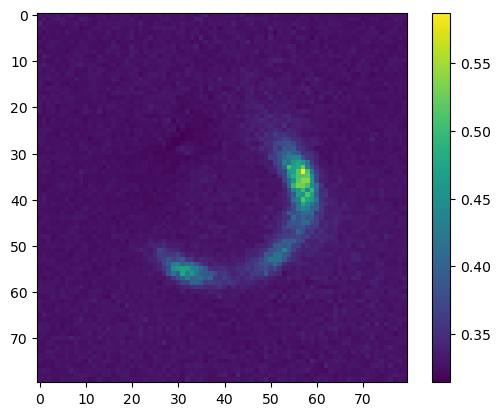

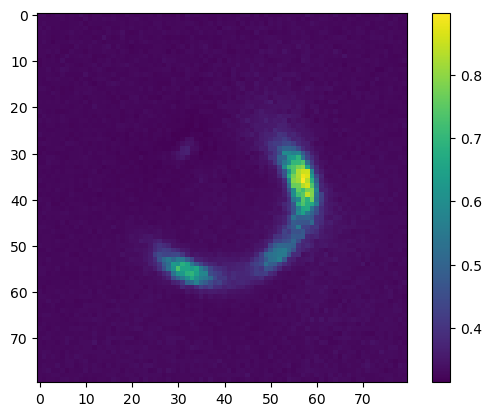

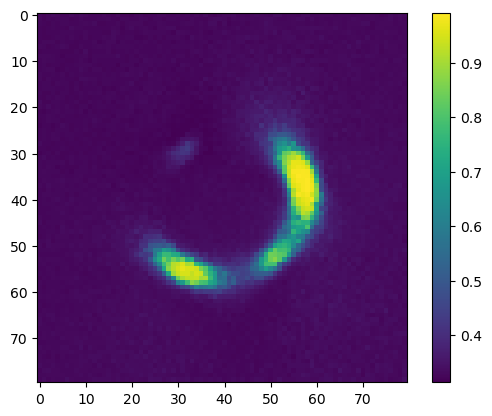

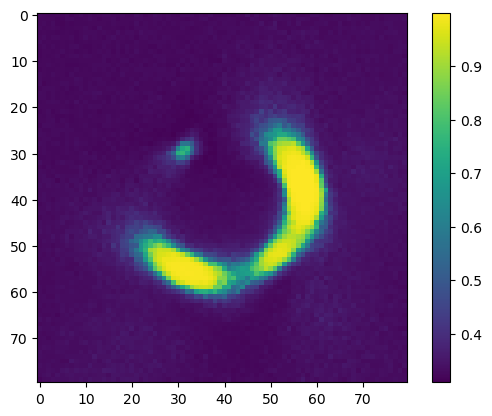

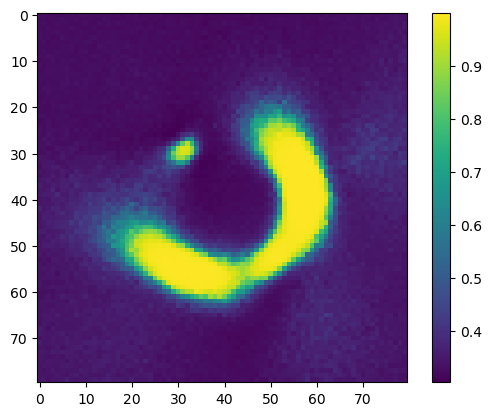

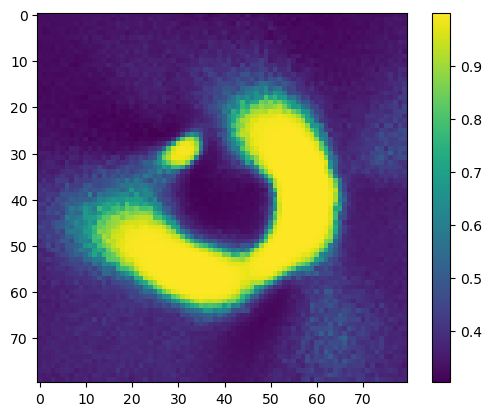

torch.Size([6400, 14])


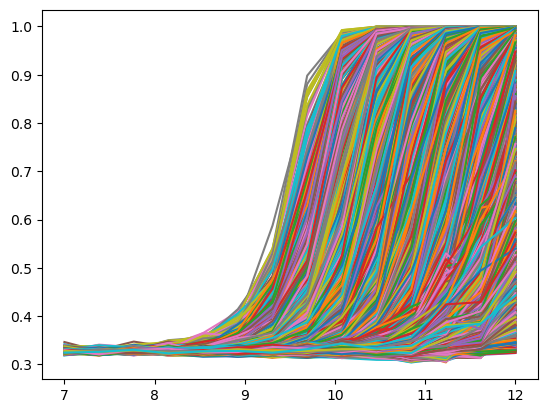

In [7]:
probs=torch.softmax(logits_matr, dim=0)

import matplotlib.pyplot as plt

for i in range(12):
    plt.imshow(probs[1][i])
    plt.colorbar()
    plt.show()
    
prob_pos=probs[1]

prob_pos_flat=prob_pos.permute(1, 2, 0).reshape(-1, 14)
print( prob_pos_flat.shape)

for i in range (prob_pos_flat.shape[0]):
    plt.plot(torch.linspace(7.,12., 14),prob_pos_flat[i])
plt.show()

In [ ]:
print(probs.shape)

In [9]:
R=torch.log10(probs[1]/probs[0])

In [10]:
print(R.shape)


torch.Size([14, 80, 80])


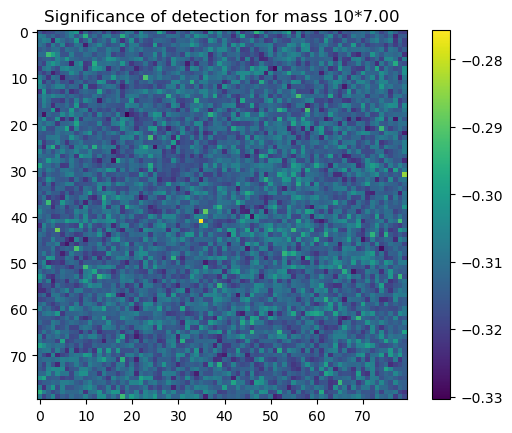

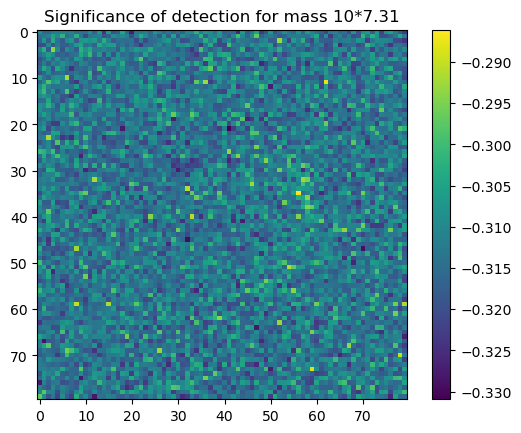

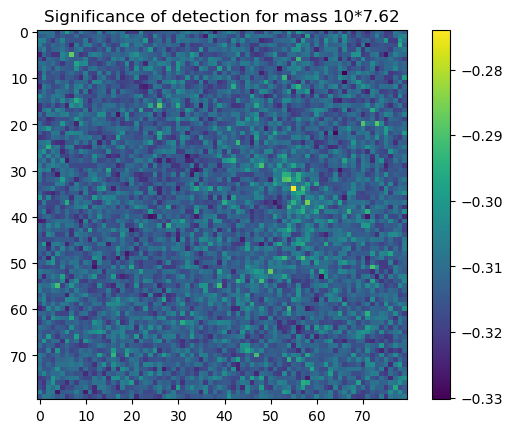

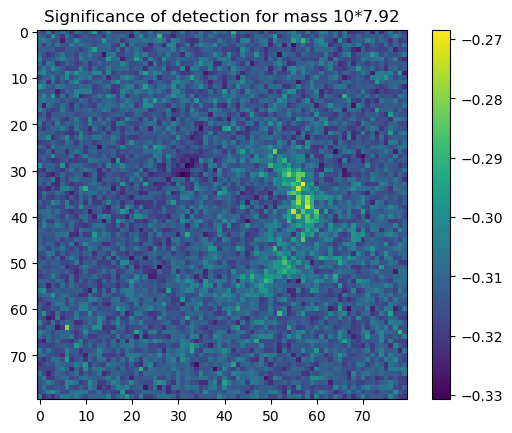

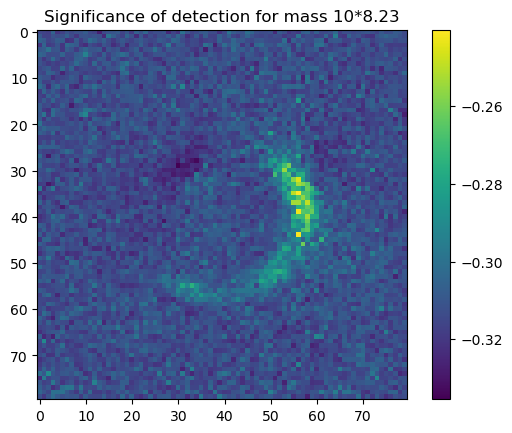

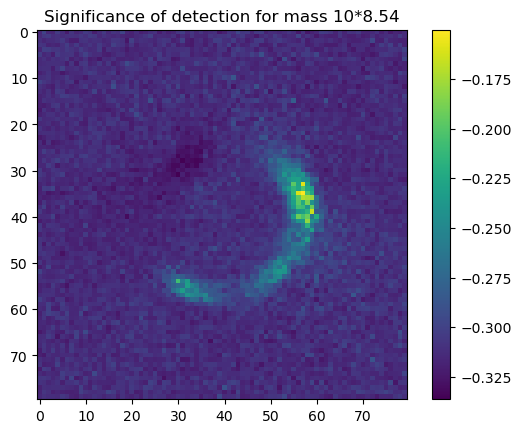

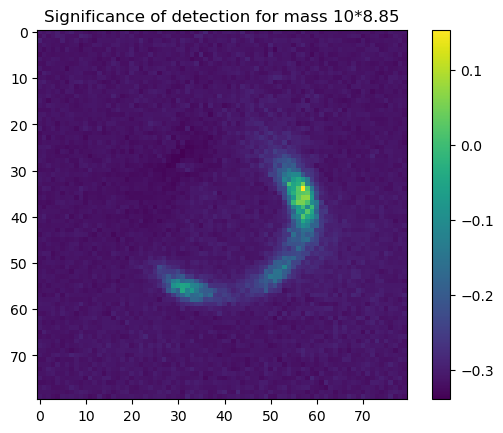

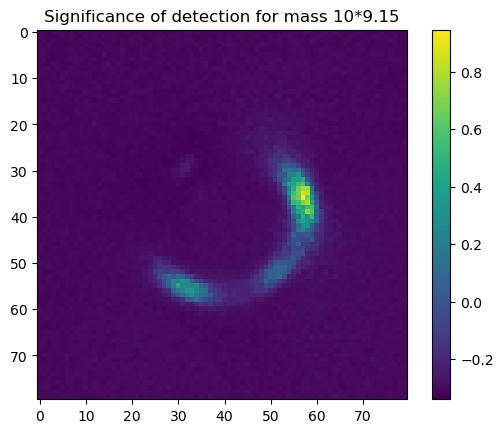

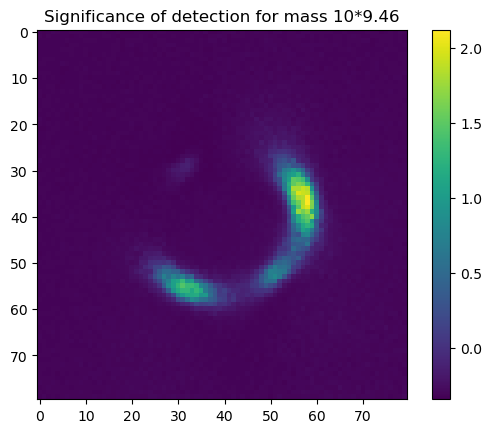

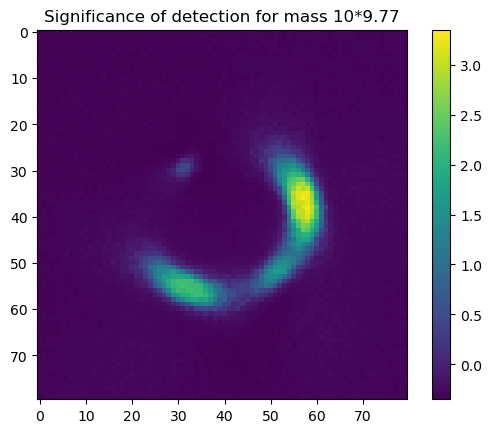

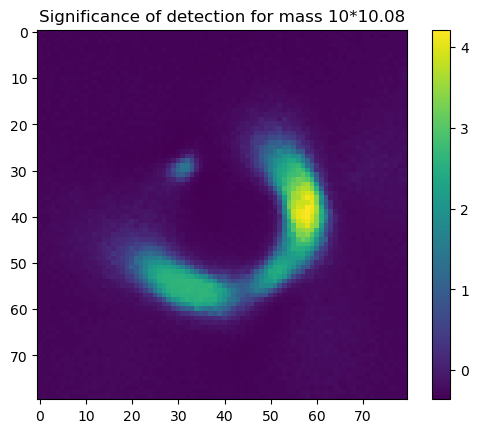

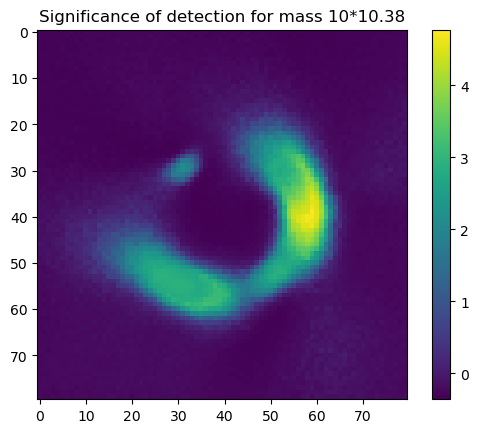

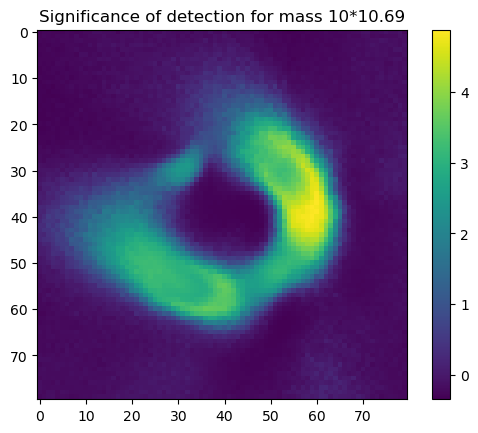

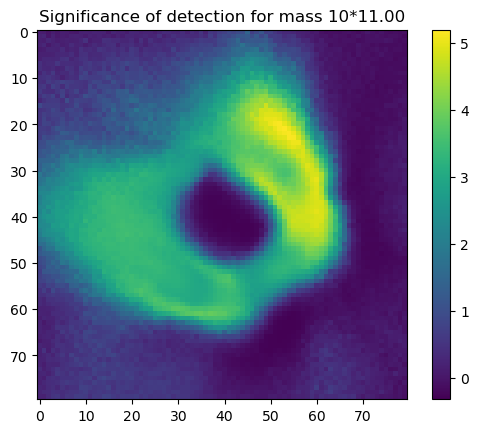

In [11]:
import matplotlib.pyplot as plt

for i in range(14):
    plt.imshow(R[i])
    plt.title(f"Significance of detection for mass 10*{torch.linspace(7.,11., 14)[i]:.2f}")
    plt.colorbar()
    plt.show()

In [12]:
from substructure_classifier.training_stage_development import Stage
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

import torch
torch.set_float32_matmul_precision('high')


example_config=Stage.get_example_config(return_config=True)
my_classifier=SubstructureClassifier("ResnetNoiseHighRes_mult_gains")


example_config["training_catalog"]="conor_train_gauss_source_10e8_6_resample_theta_train_2"

example_config["validation_like_train_catalog"]="conor_train_gauss_source_10e8_6_resample_theta_val_2"
example_config["dataset_class_str"]="SingleTelescopeNoiseDataset"
example_config["dataset_config"]={
            "grid_width_arcsec":8.0,
            "grid_pixel_side":250,
            "upscaling":2,
            "broadcasting":True,
            "sky_level":0.4,
            "kernel_size":5,
            "kernel_sigma":1.0,
            "gain_interval": [500, 1e6],
            "final_transform": False
}

example_config["samples_used_for_training"]=1000000#1000000
example_config["samples_used_for_validation"]=3000
example_config["batch_size"]=256
example_config["jump_batch_val"]=400
example_config["learning_rate"]=0.0000001
example_config["epochs"]=25
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)





doneStage1
doneStage2
doneStage3
doneStage4
doneStage5
load_stage1
load_stage2
load_stage2.1
load_stage2.2
load_stage3
load_stage4
load_stage5
load_stage6
doneStage6
doneStage7
load_stage1
load_stage2
load_stage2.1
load_stage2.2
load_stage3
load_stage4
load_stage5
load_stage6
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog conor_train_gauss_source_10e8_6_resample_theta_train_2 already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog conor_train_gauss_source_10e8_6_resample_theta_val_2 already exists in active validation catalogs.
should have updated the classifier config file
load_stage1
load_stage2
load_stage2.1
load_stage2.2
load_stage3
load_stage4
load_stage5
load_stage6
Implement the device compatibility check in _check_ready_to_train, util.py
Using device: cuda
Using broadcasting mode
Using device: c

/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu-cuda-12.1/anaconda_3_2023.03-2023.03/2.2.0/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


KeyboardInterrupt: 